The task is to make a proper schedule for Skoltech.

The schedule must define for each subject: auditorium, time slots, days of the week. One course can not take place several times during one day, with the exception for "Basic Molecular Biology Techniques+Seminar", it takes the all Wednesday.

The constraints are given in 4 tables.

<ol>
 <li>'CoursesOverlapping': 
<p>For each pair of subjects we know whether they can overlap or not (the same day, the same time). </p></li>
 <li> 'CoursesWorkload': 
<p>Number of session per week and the session length is given.</p></li>
<li>'Courses vs Time-slots' :
<p>Preferable time slots for each course:
       <ul>
        <li>-1 - the time slot is totally inapplicable for the course because of the course type (see session lengths);</li>
        <li>0 - the time slot is very inconvenient;</li>
        <li>1 - the time slot is okay, but could be better;</li>
        <li>2 - the time slot can be used for the course session;</li>
        </ul>
</p>         
       
<li>'Courses vs Classrooms': 
<p>Preferable auditoriums for different courses: 
       <ul>
        <li>-1 - the auditorium is totally inapplicable for the course ;</li>
        <li>0 - the auditorium is very inconvenient; </li>
        <li>1 - the auditorium is okay, but could be better;</li>
        <li>2 - the auditorium can be used for the course session;</li>
       </ul>        
</p>
</li> 
</ol>
Also, take into account weekly events : 
Energy Colloquium and Skoltech Colloquium, Tue (4-5pm) and Thu (4-5pm) respectively, both are held in room 402.


In [1]:
import pandas as pd 
import numpy as np
xl = pd.ExcelFile("./MatrixForScheduling.xlsx", header = ['Basic Molecular Biology Techniques'])
df = pd.read_excel(xl, 'CoursesOverlapping')
courseNames = df.columns[1:]
overlapping = df.as_matrix()[:, 1:].astype(np.int)
for i in range(overlapping.shape[0]):
    overlapping[i,i] = 0
print overlapping.shape

(25L, 25L)


In [2]:
df

,0 = cannot overlap / 1 = can overlap,Basic Molecular Biology Techniques+Seminar,Bioinformatics Lab Course,Imaging in Biology,Functional Genomics,Mathematical Modeling in Biology,Ideas to Impact / Technology Commercialization,Energy Systems (Physics) & Technology,Methods for Enhanced Oil Recovery,Petrophysics and Reservoir Engineering,...,Convex Optimization for Data Science,Numerical Linear Algebra,Optimization Methods,Structural Analysis and Design,Pedagogy of Higher Education,History and Philosophy of Science,Spacecraft and Mission Design,Robotics,Energy Colloquium,Skoltech Colloquium
0,Basic Molecular Biology Techniques+Seminar,1,0,0,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,Bioinformatics Lab Course,0,1,0,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,Imaging in Biology,0,0,1,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,Functional Genomics,0,0,0,1,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,Mathematical Modeling in Biology,0,0,0,0,1,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5,Ideas to Impact / Technology Commercialization,0,0,0,0,0,1,0,1,0,...,1,1,1,0,0,0,0,0,1,1
6,Energy Systems (Physics) & Technology,1,1,1,1,1,0,1,1,0,...,1,1,1,1,1,1,1,1,1,1
7,Methods for Enhanced Oil Recovery,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,1
8,Petrophysics and Reservoir Engineering,1,1,1,1,1,0,0,1,1,...,1,1,1,1,1,1,1,1,1,1
9,Computational Chemistry and Materials Modelling,1,1,1,1,1,0,1,1,1,...,1,1,1,0,1,1,1,1,1,1


In [3]:
np.all(overlapping == overlapping.T)

True

In [4]:
df = pd.read_excel(xl, 'CoursesWorkload')
workload = df.as_matrix()[:,:].astype(np.int)
workload.shape

(23L, 2L)

In [5]:
df

,sessions per week,session length
Basic Molecular Biology Techniques+Seminar,1,9
Bioinformatics Lab Course,2,2
Imaging in Biology,2,2
Functional Genomics,2,2
Mathematical Modeling in Biology,2,2
Ideas to Impact / Technology Commercialization,3,3
Energy Systems (Physics) & Technology,3,3
Methods for Enhanced Oil Recovery,3,3
Petrophysics and Reservoir Engineering,3,3
Computational Chemistry and Materials Modelling,3,3


In [6]:
df = pd.read_excel(xl, 'Courses vs Classrooms')
roomCourse = df.as_matrix()[:,1:-3].astype(np.int)
roomNames = df.as_matrix()[:,0]
print roomCourse.shape

(9L, 23L)


In [7]:
df

,"-1=impossible, 0=not suitable, 1=ok, but better to avoid, 2=suitable'",Basic Molecular Biology Techniques,Bioinformatics Lab Course,Imaging in Biology,Functional Genomics,Mathematical Modeling in Biology,Ideas to Impact / Technology Commercialization,Energy Systems (Physics) & Technology,Methods for Enhanced Oil Recovery,Petrophysics and Reservoir Engineering,...,Numerical Linear Algebra,Optimization Methods,Structural Analysis and Design,Pedagogy of Higher Education,History and Philosophy of Science,Spacecraft and Mission Design,Robotics,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,402,-1,2,2,2,2,1,2,2,2,...,0,0,2,2,2,-1,2,NaN,NaN,NaN
1,403,-1,2,2,2,2,1,2,2,2,...,0,0,2,2,2,-1,2,NaN,Energy Colloquium,402.0
2,404,-1,2,2,2,2,0,2,2,2,...,0,0,2,2,2,-1,2,NaN,Skoltech Colloquium,402.0
3,407,-1,2,2,2,2,2,2,2,2,...,2,2,2,2,2,-1,2,NaN,NaN,NaN
4,408,-1,2,2,2,2,2,2,2,2,...,2,2,2,2,2,-1,2,NaN,NaN,NaN
5,423,-1,0,0,0,0,0,1,2,2,...,0,0,1,0,0,-1,0,NaN,NaN,NaN
6,422,-1,0,0,0,0,0,0,2,2,...,0,0,0,0,0,-1,0,NaN,NaN,NaN
7,Space CREI Lab,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,2,-1,NaN,NaN,NaN
8,Venue: Institute of Gene Biology,2,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,NaN,NaN,NaN


In [8]:
df = pd.read_excel(xl, 'Courses vs Time-slots ')
couseTime = df.as_matrix()[:,1:-3].astype(np.int)
print  couseTime.shape

(7L, 23L)


In [9]:
df

,"-1=impossible, 0=not suitable, 1=ok, but better to avoid, 2=suitable'",Basic Molecular Biology Techniques+Seminar,Bioinformatics Lab Course,Imaging in Biology,Functional Genomics,Mathematical Modeling in Biology,Ideas to Impact / Technology Commercialization,Energy Systems (Physics) & Technology,Methods for Enhanced Oil Recovery,Petrophysics and Reservoir Engineering,...,Numerical Linear Algebra,Optimization Methods,Structural Analysis and Design,Pedagogy of Higher Education,History and Philosophy of Science,Spacecraft and Mission Design,Robotics,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,9.00 -12.00,2,-1,-1,-1,-1,1,2,0,0,...,1,1,2,2,2,2,2,NaN,NaN,NaN
1,12.30 - 15.30,2,-1,-1,-1,-1,1,2,1,1,...,2,2,2,2,2,2,2,NaN,Energy Colloquium,Tuesday 4-5 pm
2,16.00 - 19.00,2,-1,-1,-1,-1,2,2,2,2,...,1,1,2,2,2,2,1,NaN,Skoltech Colloquium,Thursday 4-5 pm
3,9.00 - 11.00,-1,2,2,2,2,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,NaN,NaN,NaN
4,11.30 - 13.30,-1,2,2,2,2,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,NaN,NaN,NaN
5,14.00 - 16.00,-1,2,2,2,2,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,NaN,NaN,NaN
6,16. 30 - 18.30,-1,2,2,2,2,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,NaN,NaN,NaN


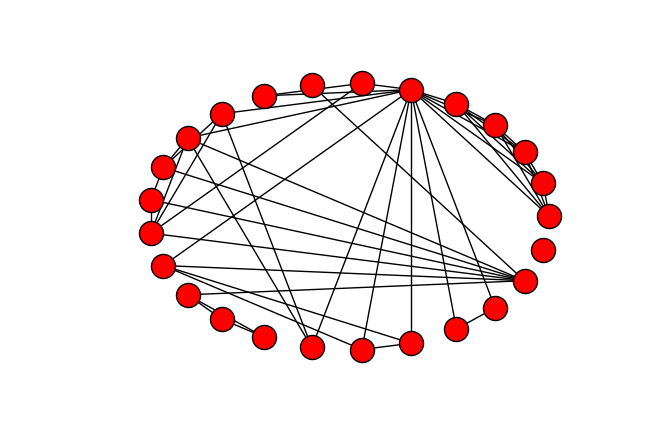

connected components 2
number of cliques [[5, 0, 1, 2, 3, 4], [5, 14, 19, 20], [5, 6, 8], [5, 9, 18], [5, 10, 18], [5, 21, 22], [11, 23, 10], [11, 23, 12], [12, 13, 23], [13, 10, 23], [15, 16, 17], [7, 23], [11, 9], [13, 9], [13, 6], [15, 23], [23, 14], [24]]


In [16]:
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline
G = nx.Graph()
G.add_nodes_from(range(overlapping.shape[0]))
for i in range(overlapping.shape[0]-1):
    for j in range(i+1,overlapping.shape[0]):
        if overlapping[i,j] == 0:
            G.add_edge(i,j)
nx.draw(G,pos=nx.shell_layout(G)) 
plt.show()
print 'connected components',nx.number_connected_components(G)
cliques = list(nx.find_cliques(G))
cliques = sorted(cliques,key = lambda x : -len(x))
print 'number of cliques',cliques

In [31]:

def is_colloq(c,r,d,t,l):
    return (((d==1)  and ((r==0) or (overlapping[-2,c] == 0))) or ((d == 3) and ((r == 0) or (overlapping[-1,c] == 0))))  and ((14 in range(t,t+l)) or (15 in range(t,t+l)))


def SA():
    courses = workload[:,0].copy()
    roomPref = []
    for c in  range(roomCourse.shape[1]):
        cp = []
        for r in range(roomCourse.shape[0]):
            if(roomCourse[r,c] > 1):#consider just best fitted rooms
                cp.append(r)
        roomPref.append(np.array(cp))
        
    timePref = np.zeros((courses.shape[0],20))
    for i in range(couseTime.shape[1]):
        for j in range(3):
            if couseTime[j,i] >= 1:#consider just sutable time
                timePref[i,j+j*6:j+(j+1)*6] = couseTime[j,i]
        for j in range(4):
            if couseTime[j+3,i] >= 1:
                timePref[i,j+j*4:j+(j+1)*4] = 1
    timePref[0,:] = 2

    availableTime = np.zeros((courses.shape[0],19))
    for i in range(couseTime.shape[1]):
        for j in range(3):
            if couseTime[j,i] >= 1:#consider just sutable time
                availableTime[i,j+j*6] = 1
        for j in range(4):
            if couseTime[j+3,i] >= 1:
                availableTime[i,j+j*4] = 1
    availableTime[0,:] = 0
    availableTime[0,0] = 1
    
    timeTable = -np.ones((5,roomCourse.shape[0],20),dtype=np.int)
    def get_course():
        c = np.random.choice(np.arange(courses.shape[0])[courses > 0])
        return c

    def get_day(c):
        return np.random.choice(np.arange(5))

    def get_room(c,d):
        return np.random.choice(roomPref[c])

    def get_time(c,d,r):
        l = workload[c,1]*2
        t = np.random.choice(np.arange(availableTime.shape[1])[availableTime[c,:] > 0])
        return t,l

    def get_supplant(c,d,r,t,l):
        ar1 = np.unique(timeTable[d,:,t:t+l].flatten())
        ar1 = ar1[ar1 != -1]
        ar1 = ar1[overlapping[c,ar1]==0]
        ar2 = np.unique(timeTable[d,r,t:t+l])
        ar2 = ar2[ar2!=-1]
        ar3 = np.unique(timeTable[d,:,:][timeTable[d,:,:] == c].flatten())
        ar = np.concatenate((ar1,ar2,ar3))
        if(len(ar) == 0):
            return np.array([],dtype=np.int)
        supplant = np.unique(ar)
        return supplant
    
    def get_supplant_time(c,d,r,t,l):
        supplant = []
        time = 0
        for _r in range(timeTable.shape[1]):
            for _t in range(timeTable.shape[2]):
                _c = timeTable[d,_r,_t]
                if(_c == -1):
                    continue;
                if (_c == c) or ((overlapping[c,_c] == 0 or _r == r) and (_t >=t) and (_t < t+l)):
                    supplant.append(_c)
                    time += timePref[_c][timeTable[d,_r,:] == _c].min()
        return np.unique(np.array(supplant,dtype=np.int)),float(time)

    def insert(c,d,r,t,l,supplant):
        if len(supplant) > 0:
            arr = timeTable[d,:,:]
            for s in supplant:
                arr[arr == s] = -1
            timeTable[d,:,:] = arr
        timeTable[d,r,t:t+l] = c
        courses[supplant] += 1
        courses[c] -= 1
    
    def extract():
        cc = np.zeros(courses.shape[0],dtype=np.int)
        for d in range(timeTable.shape[0]):
            for r in range(timeTable.shape[1]):
                for t in range(timeTable.shape[2]):
                    c = timeTable[d,r,t]
                    if(c != -1):
                        if(timePref[c,t] != 2):
                            print timeTable[d,r,:],c
                            cc[c]+=1
                            timeTable[d,r,:][timeTable[d,r,:] == c] = -1
        return cc
    
    T = 2
    
    while(courses.sum() > 0):
        c = get_course()
        d = get_day(c)
        r = get_room(c,d)
        t,l = get_time(c,d,r)
        if is_colloq(c,r,d,t,l):
            continue
        supplant = get_supplant(c,d,r,t,l)
        tin = float(timePref[c,t:t+l].min())
        if (np.random.rand()*(len(supplant))**4) < 0.5:
            insert(c,d,r,t,l,supplant)
    
    #set colloq
    timeTable[1,0,14:16] = 23
    timeTable[3,0,14:16] = 24
    return timeTable

np.random.seed(3)

timeTable = SA()
print 'done!'


done!


In [32]:

def drawTimeTable(tt):
    times = [str(9+(i//2))+':'+str(3*(i%2))+'0--'+str(9+((i+1)//2))+':'+str(3*((i+1)%2))+'0' for i in range(20)]
    res = []
    for d in range(5):
        df = pd.DataFrame(index= range(20),columns = np.concatenate((np.array(['time']),roomNames)))
        df['time'] = times
        for r  in range(tt.shape[1]):
            for t in range(tt.shape[2]):
                if(tt[d,r,t] >= 0):
                    df[roomNames[r]][t] = courseNames[tt[d,r,t]]
        #writer = pd.ExcelWriter(str(d)+'.xlsx')
        #df.to_excel(writer)
        res.append(df)
    return res
        
dfs = drawTimeTable(timeTable)
dfs[0]

,time,402,403,404,407,408,423,422,Space CREI Lab,Venue: Institute of Gene Biology
0,9:00--9:30,NaN,NaN,Advanced Solid State Physics,Optimization Methods,Ideas to Impact / Technology Commercialization,NaN,NaN,NaN,NaN
1,9:30--10:00,NaN,NaN,Advanced Solid State Physics,Optimization Methods,Ideas to Impact / Technology Commercialization,NaN,NaN,NaN,NaN
2,10:00--10:30,NaN,NaN,Advanced Solid State Physics,Optimization Methods,Ideas to Impact / Technology Commercialization,NaN,NaN,NaN,NaN
3,10:30--11:00,NaN,NaN,Advanced Solid State Physics,Optimization Methods,Ideas to Impact / Technology Commercialization,NaN,NaN,NaN,NaN
4,11:00--11:30,NaN,NaN,Advanced Solid State Physics,Optimization Methods,Ideas to Impact / Technology Commercialization,NaN,NaN,NaN,NaN
5,11:30--12:00,NaN,NaN,Advanced Solid State Physics,Optimization Methods,Ideas to Impact / Technology Commercialization,NaN,NaN,NaN,NaN
6,12:00--12:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,12:30--13:00,Convex Optimization for Data Science,NaN,NaN,Energy Systems (Physics) & Technology,NaN,NaN,NaN,NaN,NaN
8,13:00--13:30,Convex Optimization for Data Science,NaN,NaN,Energy Systems (Physics) & Technology,NaN,NaN,NaN,NaN,NaN
9,13:30--14:00,Convex Optimization for Data Science,NaN,NaN,Energy Systems (Physics) & Technology,NaN,NaN,NaN,NaN,NaN


In [33]:
dfs[1]

,time,402,403,404,407,408,423,422,Space CREI Lab,Venue: Institute of Gene Biology
0,9:00--9:30,Structural Analysis and Design,NaN,Bioinformatics Lab Course,Optimization Methods,Pedagogy of Higher Education,NaN,NaN,NaN,NaN
1,9:30--10:00,Structural Analysis and Design,NaN,Bioinformatics Lab Course,Optimization Methods,Pedagogy of Higher Education,NaN,NaN,NaN,NaN
2,10:00--10:30,Structural Analysis and Design,NaN,Bioinformatics Lab Course,Optimization Methods,Pedagogy of Higher Education,NaN,NaN,NaN,NaN
3,10:30--11:00,Structural Analysis and Design,NaN,Bioinformatics Lab Course,Optimization Methods,Pedagogy of Higher Education,NaN,NaN,NaN,NaN
4,11:00--11:30,Structural Analysis and Design,NaN,NaN,Optimization Methods,NaN,NaN,NaN,NaN,NaN
5,11:30--12:00,Structural Analysis and Design,NaN,NaN,Optimization Methods,Mathematical Modeling in Biology,NaN,NaN,NaN,NaN
6,12:00--12:30,NaN,NaN,NaN,NaN,Mathematical Modeling in Biology,NaN,NaN,NaN,NaN
7,12:30--13:00,Material Structure Characterization Methods,NaN,Computational Chemistry and Materials Modelling,Methods for Enhanced Oil Recovery,Mathematical Modeling in Biology,Photonics Review,NaN,NaN,NaN
8,13:00--13:30,Material Structure Characterization Methods,NaN,Computational Chemistry and Materials Modelling,Methods for Enhanced Oil Recovery,Mathematical Modeling in Biology,Photonics Review,NaN,NaN,NaN
9,13:30--14:00,Material Structure Characterization Methods,NaN,Computational Chemistry and Materials Modelling,Methods for Enhanced Oil Recovery,NaN,Photonics Review,NaN,NaN,NaN


In [34]:
dfs[2]

,time,402,403,404,407,408,423,422,Space CREI Lab,Venue: Institute of Gene Biology
0,9:00--9:30,Material Structure Characterization Methods,History and Philosophy of Science,Energy Systems (Physics) & Technology,Mathematical Modeling in Biology,NaN,NaN,NaN,Spacecraft and Mission Design,NaN
1,9:30--10:00,Material Structure Characterization Methods,History and Philosophy of Science,Energy Systems (Physics) & Technology,Mathematical Modeling in Biology,NaN,NaN,NaN,Spacecraft and Mission Design,NaN
2,10:00--10:30,Material Structure Characterization Methods,History and Philosophy of Science,Energy Systems (Physics) & Technology,Mathematical Modeling in Biology,NaN,NaN,NaN,Spacecraft and Mission Design,NaN
3,10:30--11:00,Material Structure Characterization Methods,History and Philosophy of Science,Energy Systems (Physics) & Technology,Mathematical Modeling in Biology,NaN,NaN,NaN,Spacecraft and Mission Design,NaN
4,11:00--11:30,Material Structure Characterization Methods,History and Philosophy of Science,Energy Systems (Physics) & Technology,NaN,NaN,NaN,NaN,Spacecraft and Mission Design,NaN
5,11:30--12:00,Material Structure Characterization Methods,History and Philosophy of Science,Energy Systems (Physics) & Technology,NaN,Functional Genomics,NaN,NaN,Spacecraft and Mission Design,NaN
6,12:00--12:30,NaN,NaN,NaN,NaN,Functional Genomics,NaN,NaN,NaN,NaN
7,12:30--13:00,NaN,Selected Topics in Energy,Structural Analysis and Design,Robotics,Functional Genomics,NaN,NaN,NaN,NaN
8,13:00--13:30,NaN,Selected Topics in Energy,Structural Analysis and Design,Robotics,Functional Genomics,NaN,NaN,NaN,NaN
9,13:30--14:00,NaN,Selected Topics in Energy,Structural Analysis and Design,Robotics,NaN,NaN,NaN,NaN,NaN


In [35]:
dfs[3]

,time,402,403,404,407,408,423,422,Space CREI Lab,Venue: Institute of Gene Biology
0,9:00--9:30,Material Structure Characterization Methods,Photonics Review,NaN,Optimization Methods,Selected Topics in Energy,NaN,NaN,NaN,Basic Molecular Biology Techniques+Seminar
1,9:30--10:00,Material Structure Characterization Methods,Photonics Review,NaN,Optimization Methods,Selected Topics in Energy,NaN,NaN,NaN,Basic Molecular Biology Techniques+Seminar
2,10:00--10:30,Material Structure Characterization Methods,Photonics Review,NaN,Optimization Methods,Selected Topics in Energy,NaN,NaN,NaN,Basic Molecular Biology Techniques+Seminar
3,10:30--11:00,Material Structure Characterization Methods,Photonics Review,NaN,Optimization Methods,Selected Topics in Energy,NaN,NaN,NaN,Basic Molecular Biology Techniques+Seminar
4,11:00--11:30,Material Structure Characterization Methods,Photonics Review,NaN,Optimization Methods,Selected Topics in Energy,NaN,NaN,NaN,Basic Molecular Biology Techniques+Seminar
5,11:30--12:00,Material Structure Characterization Methods,Photonics Review,NaN,Optimization Methods,Selected Topics in Energy,NaN,NaN,NaN,Basic Molecular Biology Techniques+Seminar
6,12:00--12:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Basic Molecular Biology Techniques+Seminar
7,12:30--13:00,Petrophysics and Reservoir Engineering,NaN,NaN,Computational Chemistry and Materials Modelling,NaN,NaN,NaN,NaN,Basic Molecular Biology Techniques+Seminar
8,13:00--13:30,Petrophysics and Reservoir Engineering,NaN,NaN,Computational Chemistry and Materials Modelling,NaN,NaN,NaN,NaN,Basic Molecular Biology Techniques+Seminar
9,13:30--14:00,Petrophysics and Reservoir Engineering,NaN,NaN,Computational Chemistry and Materials Modelling,NaN,NaN,NaN,NaN,Basic Molecular Biology Techniques+Seminar


In [36]:
dfs[4]

,time,402,403,404,407,408,423,422,Space CREI Lab,Venue: Institute of Gene Biology
0,9:00--9:30,Imaging in Biology,Computational Chemistry and Materials Modelling,Pedagogy of Higher Education,Photonics Review,NaN,NaN,NaN,NaN,NaN
1,9:30--10:00,Imaging in Biology,Computational Chemistry and Materials Modelling,Pedagogy of Higher Education,Photonics Review,NaN,NaN,NaN,NaN,NaN
2,10:00--10:30,Imaging in Biology,Computational Chemistry and Materials Modelling,Pedagogy of Higher Education,Photonics Review,NaN,NaN,NaN,NaN,NaN
3,10:30--11:00,Imaging in Biology,Computational Chemistry and Materials Modelling,Pedagogy of Higher Education,Photonics Review,NaN,NaN,NaN,NaN,NaN
4,11:00--11:30,NaN,Computational Chemistry and Materials Modelling,NaN,Photonics Review,NaN,NaN,NaN,NaN,NaN
5,11:30--12:00,NaN,Computational Chemistry and Materials Modelling,NaN,Photonics Review,NaN,NaN,NaN,NaN,NaN
6,12:00--12:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,12:30--13:00,NaN,NaN,NaN,Ideas to Impact / Technology Commercialization,Introduction to Solid State Physics,Methods for Enhanced Oil Recovery,NaN,NaN,NaN
8,13:00--13:30,NaN,NaN,NaN,Ideas to Impact / Technology Commercialization,Introduction to Solid State Physics,Methods for Enhanced Oil Recovery,NaN,NaN,NaN
9,13:30--14:00,NaN,NaN,NaN,Ideas to Impact / Technology Commercialization,Introduction to Solid State Physics,Methods for Enhanced Oil Recovery,NaN,NaN,NaN


In [37]:

def calcMetrix(timeTable):
    metrix = 0
    timePref = -1*np.ones((workload.shape[0],20))
    for c in range(workload.shape[0]):
        for t in range(3):
            for k in range(6):
                timePref[c,t+t*6+k] = couseTime[t,c]
        for t in range(4):
            for k in range(4):
                if(timePref[c,t+t*4+k] == -1):
                    timePref[c,t+t*4+k] = couseTime[t+3,c] 
    #check sessions per week
    for i in range(len(workload[:,1])):
        if(workload[i,1]*workload[i,0]*2 != np.ones(timeTable.shape)[timeTable == i].sum()):
            print 'wrong sessions per week',i
    for d in range(timeTable.shape[0]):
        for r  in range(timeTable.shape[1]):
            for t  in range(timeTable.shape[2]):
                if timeTable[d,r,t] > 0:
                    c = timeTable[d,r,t]
                    if(c == 23 or c == 24):
                        if  not is_colloq(c,r,d,t,1):
                            print "wrong for colloq"
                            break
                        else:
                            continue;
                    if(np.ones((timeTable.shape[1],timeTable.shape[2]),dtype=np.int)[timeTable[d,:,:]==c].sum() != workload[c,0]*2):
                        print "wrong workload",d,r,t,c
                        print workload[c,0]*2,timeTable[d,r,:]
                        print np.ones((timeTable.shape[1],timeTable.shape[2]),dtype=np.int)[timeTable[d,:,:]==c].sum()
                    
                    if (roomCourse[r,c] < 2):
                        print "wrong room ",roomNames[r],' for course '+courseNames[c]
                        break
                    if timePref[c,t] <= 1:
                        print "wrong time "+str(t)+'for course '+courseNames[c]
                        break
                    metrix += roomCourse[r,c]*timePref[c,t]
    return metrix

calcMetrix(timeTable)

wrong time 14for course Introduction to Solid State Physics
wrong time 0for course Optimization Methods
wrong time 0for course Ideas to Impact / Technology Commercialization
wrong time 7for course Material Structure Characterization Methods
wrong time 7for course Computational Chemistry and Materials Modelling
wrong time 0for course Optimization Methods
wrong time 14for course Introduction to Solid State Physics
wrong time 14for course Numerical Linear Algebra
wrong time 14for course Advanced Solid State Physics
wrong time 7for course Petrophysics and Reservoir Engineering
wrong time 14for course Robotics
wrong time 0for course Optimization Methods
wrong time 7for course Ideas to Impact / Technology Commercialization
wrong time 14for course Advanced Solid State Physics
wrong time 7for course Methods for Enhanced Oil Recovery


800.0